# H6

In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import os
import seaborn as sns
sns.set(style="darkgrid")
import json
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display
from pandas.plotting import scatter_matrix

## Neural network as a function 
    
In this part of the homework you are to construct three feed forward neural networks consisting of an input layer, one hidden layer with 1, 2 and 4 nodes respectively, and an output layer.  The hidden layer uses the sigmoid as the activation function and use a linear  output node. 
You should code the equations from scratch. 

You are given three datasets containing ($x,y$) points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

**1.1** Create a plot of each dataset and explore the structure of the data. 

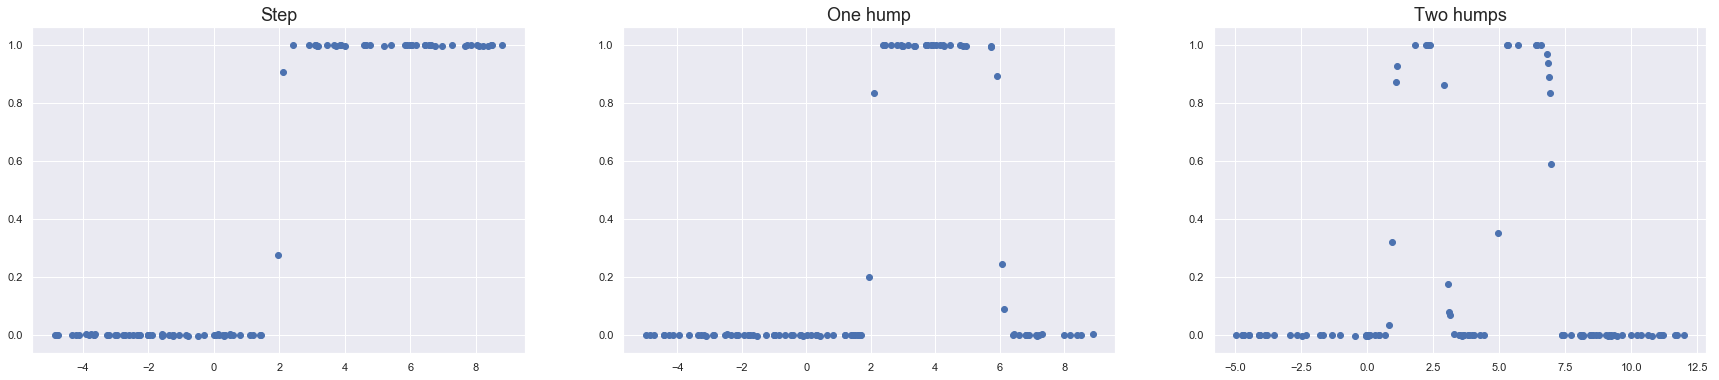

In [4]:
## Read the data
step_df = pd.read_csv('data/step_df.csv')
one_hump_df = pd.read_csv('data/one_hump_df.csv')
two_hump_df = pd.read_csv('data/two_hump_df.csv')

step_df = step_df.sort_values(by='x')
one_hump_df = one_hump_df.sort_values(by='x')
two_hump_df = two_hump_df.sort_values(by='x')

## Plot the data
fig, ax = plt.subplots(1,3, figsize=(30,6)) 

ax[0].scatter(step_df.x,step_df.y)
ax[0].set_title('Step', fontsize=18)

ax[1].scatter(one_hump_df.x, one_hump_df.y)
ax[1].set_title('One hump', fontsize=18)

ax[2].scatter(two_hump_df.x, two_hump_df.y)
ax[2].set_title('Two humps', fontsize=18);

**1.2** Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weights (again manualy) until the plots match as closely as possible.

In [5]:
## sigmoid function
def sigmoid(x: float) -> float :
    return (1/(1 + np.exp(-x))) 

## Forward pass - step
def forward_step(X_in: np.ndarray, WL_0: np.ndarray, WL_1: np.ndarray, y_out: np.ndarray):
    """Network is 
        input layer X_in
        hidden layer z0 = activation(X_in _dot_ WL_0))
        output layer z1 = z0 _dot_ WL_1 
        
        We have two sets of weights, WL_0 and WL_1
        Not necessary to return both z0 and z1 for this question 
        but we need both for 1.5 part
    """
    
    # input layer is the actual X input with the addition of a constant 1
    ones = np.ones((len(X_in),1))    
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)

    # hidden layer
    a0 = np.dot(WL_0, L0.T)
    z0 = sigmoid(a0)

    # output layer - prepare z0 to be the input to the linear function
    ones = np.ones((len(y_out),1))
    z0 = np.append(z0.reshape(-1,1), ones,axis=1).T
    
    # affine
    a1 = np.dot(WL_1, z0)
    z1 = a1 # output layer is the linear tranformation
    
    return z1, z0

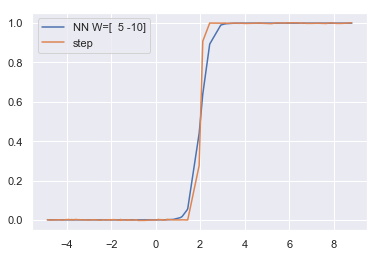

In [6]:
## ONE STEP - one node in hidden layer 
X = step_df['x'].values.reshape(-1,1)
y = step_df['y'].values

c = 2
b1 = 5
b0 = -c * b1
WL0 = np.array([b1, b0])
WL1 = np.array([1, 0]) 

## forward pass
z1, z0 = forward_step(X, WL0, WL1, y)

## Plot
plt.plot(X, z1, label='NN W=' + str(WL0))
plt.plot(step_df.x, step_df.y, label='step')
plt.legend();

**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

In [7]:
## Forward pass - one hump
def forward_onehump(X_in: np.ndarray, WL_0: np.ndarray, 
                    WL_1: np.ndarray, y_out: np.ndarray):
    
    # input layer
    ones = np.ones((len(X_in),1))    
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)

    # hidden layer
    a0 = np.dot(WL_0, L0.T)
    z0 = sigmoid(a0)

    # output layer 
    ones = np.ones((len(y_out),1))
    z0 = np.append(z0.T, ones,axis=1).T
    
    # affine
    a1 = np.dot(WL_1, z0)
    z1 = a1 
    
    return z1, z0 

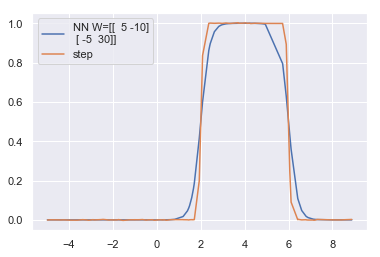

In [8]:
# ONE HUMP  - two nodes in hidden layer
X = one_hump_df['x'].values.reshape(-1,1)
Y = one_hump_df['y'].values

c1 = 2
b11 = 5
b10 = -c1*b11
c2 = 6
b21 = -5
b20 = -c2*b21

WL0 = np.array([[b11,b10], [b21,b20]])
WL1 = np.array([[1, 1, -1]]) # height of each step

## forward pass
z1, z0 = forward_onehump(X, WL0, WL1, y)

## plot
plt.plot(X,z1.T, label='NN W=' + str(WL0))
plt.plot(X, Y, label='step')
plt.legend();

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**. 

In [9]:
## Forward pass - two humps
def forward_twohump(X_in: np.ndarray, WL_0: np.ndarray, 
                    WL_1: np.ndarray, y_out: np.ndarray):
    
    # input layer
    ones = np.ones((len(X_in),1))    
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)

    # hidden layer
    a0 = np.dot(WL_0, L0.T)
    z0 = sigmoid(a0)

    # output layer 
    ones = np.ones((len(y_out),1))
    z0 = np.append(z0.T, ones,axis=1).T

    # affine
    a1 = np.dot(WL_1, z0)
    z1 = a1 
    
    return z1, z0 

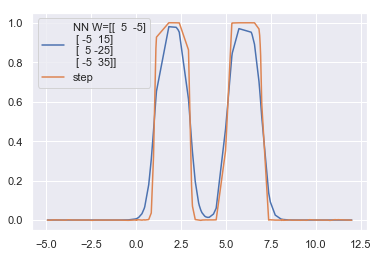

In [10]:
## TWO HUMPS  - four nodes in hidden layer 
X = two_hump_df['x'].values.reshape(-1,1)
y = two_hump_df['y'].values

c1 = 1
b11 = 5
b10 = -c1*b11

c2 = 3
b21 = -5
b20 = -c2*b21

c3 = 5
b31 = 5
b30 = -c3*b31

c4 = 7
b41 = -5
b40 = -c4*b41

WL0 = np.array([[b11,b10], [b21,b20], [b31,b30], [b41,b40]])
WL1 = np.array([[1, 1, 1, 1, -2]]) # height of each step

## forward pass
z1, z0 = forward_twohump(X, WL0, WL1, y)

## plot
plt.plot(X,z1.T, label='NN W=' + str(WL0))
plt.plot(X, y, label='step')
plt.legend();

**1.5** Calculate and report the loss from all three functions. Derive the gradient of the output layer's weights (WL_out) for all three cases (step, one hump and two humps). Perform gradient descent on the weights of this layer. What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop?

In [11]:
## Our loss function is MSE
def L(y_pred, y):
    return np.mean(np.square(y_pred - y))

def der_L_WL1(WL1, z0, y_pred, y):
    ders = 2*np.dot(z0, (y_pred - y).T)/len(y)
    ders = ders.reshape(1,ders.shape[0])
    return ders # returns vector of partial derivatives

def gradient_descent(steps, lr, WL0, WL1, X, y, fn):
    # forward pass
    z1, z0 = fn(X, WL0, WL1, y)

    # starting gradient descent here
    WL1_n_minus_1 = WL1
    L_min = L(z1,y)
    errors = [L_min]

    l = lr # learning rate
    num_steps = steps

    for i in range(num_steps):
        gradient_eval = der_L_WL1(WL1_n_minus_1, z0, z1, y) # evaluating gradient at WL1_(n-1),
        WL1_n = WL1_n_minus_1 - l*gradient_eval # updating approximation of WL1
        z1, z0 = fn(X, WL0, WL1_n, y) # evaluating function at new point
        error = L(z1, y) # finding error in approximation

        errors.append(error) # storing values of error
        WL1_n_minus_1 = WL1_n # x_n is the previous step now
    
    return z1, WL1_n, errors

**a) step function NN (a hidden layer with a single node)**

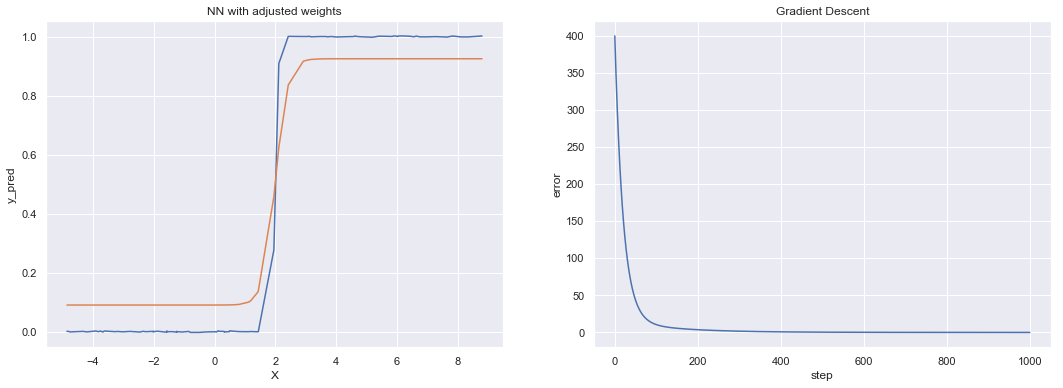

In [13]:
X = step_df['x'].values.reshape(-1,1)
y = step_df['y'].values

c = 2
b1 = 5
b0 = -c*b1
WL0 = np.array([b1,b0])
WL1 = np.array([1,20]) # starting weights

l = 0.01 # learning rate
num_steps = 1000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y, forward_step)

figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(X, y)
ax[0].plot(X, z1_new[0])
ax[0].set_xlabel('X')
ax[0].set_ylabel('y_pred')
ax[0].set_title('NN with adjusted weights')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_xlabel('step')
ax[1].set_ylabel('error')
ax[1].set_title('Gradient Descent');

**b) one hump function NN (a hidden layer with two nodes)**

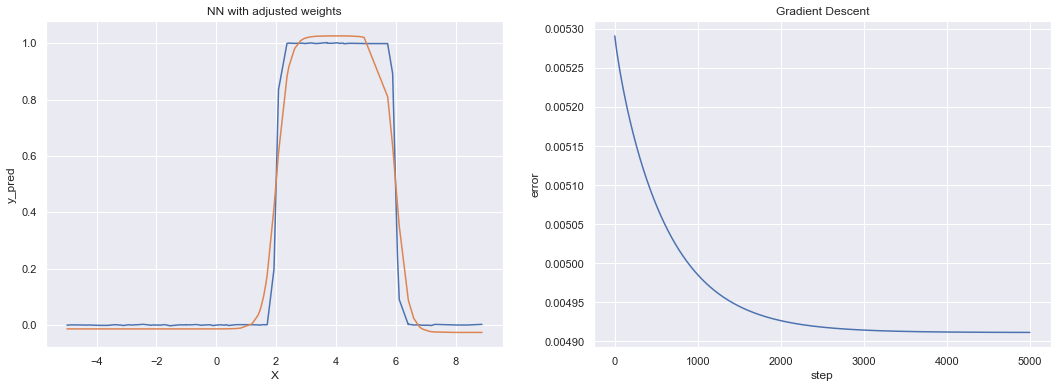

In [15]:
## ONE HUMP
X = one_hump_df['x'].values.reshape(-1,1)
y = one_hump_df['y'].values

c1 = 2
b11 = 5
b10 = -c1*b11
c2 = 6
b21 = -5
b20 = -c2*b21

WL0 = np.array([[b11,b10], [b21,b20]])
WL1 = np.array([[1, 1, -1]])

l = 0.01 # learning rate
num_steps = 5000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y, forward_onehump)

figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(X, y)
ax[0].plot(X, z1_new[0])
ax[0].set_xlabel('X')
ax[0].set_ylabel('y_pred')
ax[0].set_title('NN with adjusted weights')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_xlabel('step')
ax[1].set_ylabel('error')
ax[1].set_title('Gradient Descent');

**c) two hump function NN (a hidden layer with 4 nodes)**

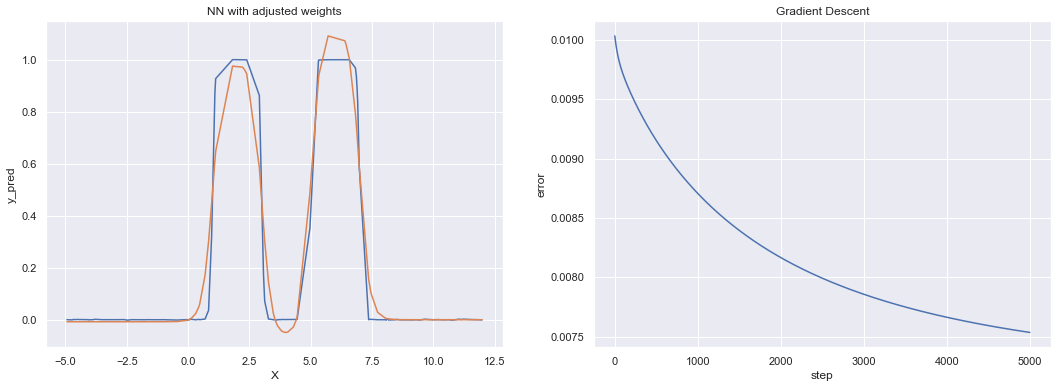

In [16]:
## TWO HUMPS
X = two_hump_df['x'].values.reshape(-1,1)
y = two_hump_df['y'].values

c1 = 1
b11 = 5
b10 = -c1*b11

c2 = 3
b21 = -5
b20 = -c2*b21

c3 = 5
b31 = 5
b30 = -c3*b31

c4 = 7
b41 = -5
b40 = -c4*b41


WL0 = np.array([[b11,b10], [b21,b20], [b31,b30], [b41,b40]])
WL1 = np.array([[1, 1, 1, 1, -2]]) # height of each step

l = 0.01 # learning rate
num_steps = 5000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y, forward_twohump)

figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(X, y)
ax[0].plot(X, z1_new[0])
ax[0].set_xlabel('X')
ax[0].set_ylabel('y_pred')
ax[0].set_title('NN with adjusted weights')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_xlabel('step')
ax[1].set_ylabel('error')
ax[1].set_title('Gradient Descent');

## Working with missing data

In this exercise we are going to use the **Pima Indians onset of diabetes** dataset found in `pima-indians-diabetes.csv`. This dataset describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. The list below shows the eight attributes plus the target variable for the dataset:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skin fold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
-  Body mass index.
-  Diabetes pedigree function.
- Age (years).<br>
- **Outcome** (1 for early onset of diabetes within five years, 0 for not), target class.



**2.1** Load the dataset into a pandas dataframe named `pima_df`. Clean the data by looking at the various features and making sure that their values make sense. Look for missing data including disguised missing data. The problem of disguised missing data arises when missing data values are not explicitly represented as such, but are coded with values that can be misinterpreted as valid data. Comment on your findings.

In [17]:
pima_df = pd.read_csv('data/pima-indians-diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2.1.1. Checking values and Removing unnecessary characters**

In [18]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,120.922775,69.111257,20.537958,80.070681,31.998429,0.472712,33.248691
std,3.374327,32.039835,19.403339,15.970234,115.431087,7.899591,0.331981,11.771901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [19]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

We notice that our target variable `Outcome` is an object but we want a number 1 or 0. So we check it's values

In [20]:
pima_df.Outcome.unique()

array(['1', '0', '0\\', '1\\', '0}'], dtype=object)

In [21]:
pima_df = pima_df.replace({'Outcome': {'1': 1, '0': 0, '0\\': 0, '1\\': 1, '0}': 0, }})
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**2.1.2. Checking for missing values**

In [22]:
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Upon first inspection we do not see any missing values. But if we look closer and without being doctors, we see that Glucose cannot be `0` so we assume that this is a missing value. Same goes for the other variables. 

In [23]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,120.922775,69.111257,20.537958,80.070681,31.998429,0.472712,33.248691,0.349476
std,3.374327,32.039835,19.403339,15.970234,115.431087,7.899591,0.331981,11.771901,0.477117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From here, we can observe that Blood Pressure, Glucose, SkinThickness, Insulin, BMI - all have minimum values of 0, which does not make logical sense. Let's see how many data points contain disguised missing data, by seeing how many of these values are 0. Thus, we can observe that there are many missing values.

In [24]:
print('Glucose = 0 for', len(pima_df[pima_df.Glucose==0]), 'rows')
print('BloodPressure = 0 for', len(pima_df[pima_df.BloodPressure==0]), 'rows')
print('SkinThickness = 0 for', len(pima_df[pima_df.SkinThickness==0]), 'rows')
print('Insulin = 0 for', len(pima_df[pima_df.Insulin==0]), 'rows')
print('BMI = 0 for', len(pima_df[pima_df.BMI==0]), 'rows')
print('Total number of rows with disguised missing data =', 
      len(pima_df[(pima_df.Glucose==0) | 
                  (pima_df.BloodPressure==0) | 
                  (pima_df.SkinThickness==0) | 
                  (pima_df.Insulin==0) | 
                  (pima_df.BMI==0)]), 'rows')
print('Total number of rows with all missing data =', 
      len(pima_df[(pima_df.Glucose==0) & 
                  (pima_df.BloodPressure==0) & 
                  (pima_df.SkinThickness==0) & 
                  (pima_df.Insulin==0) & 
                  (pima_df.BMI==0)
                 ]), 'rows')

Glucose = 0 for 5 rows
BloodPressure = 0 for 35 rows
SkinThickness = 0 for 226 rows
Insulin = 0 for 371 rows
BMI = 0 for 11 rows
Total number of rows with disguised missing data = 373 rows
Total number of rows with all missing data = 0 rows


**2.1.3. Checking correlation of columns**

(391, 9)


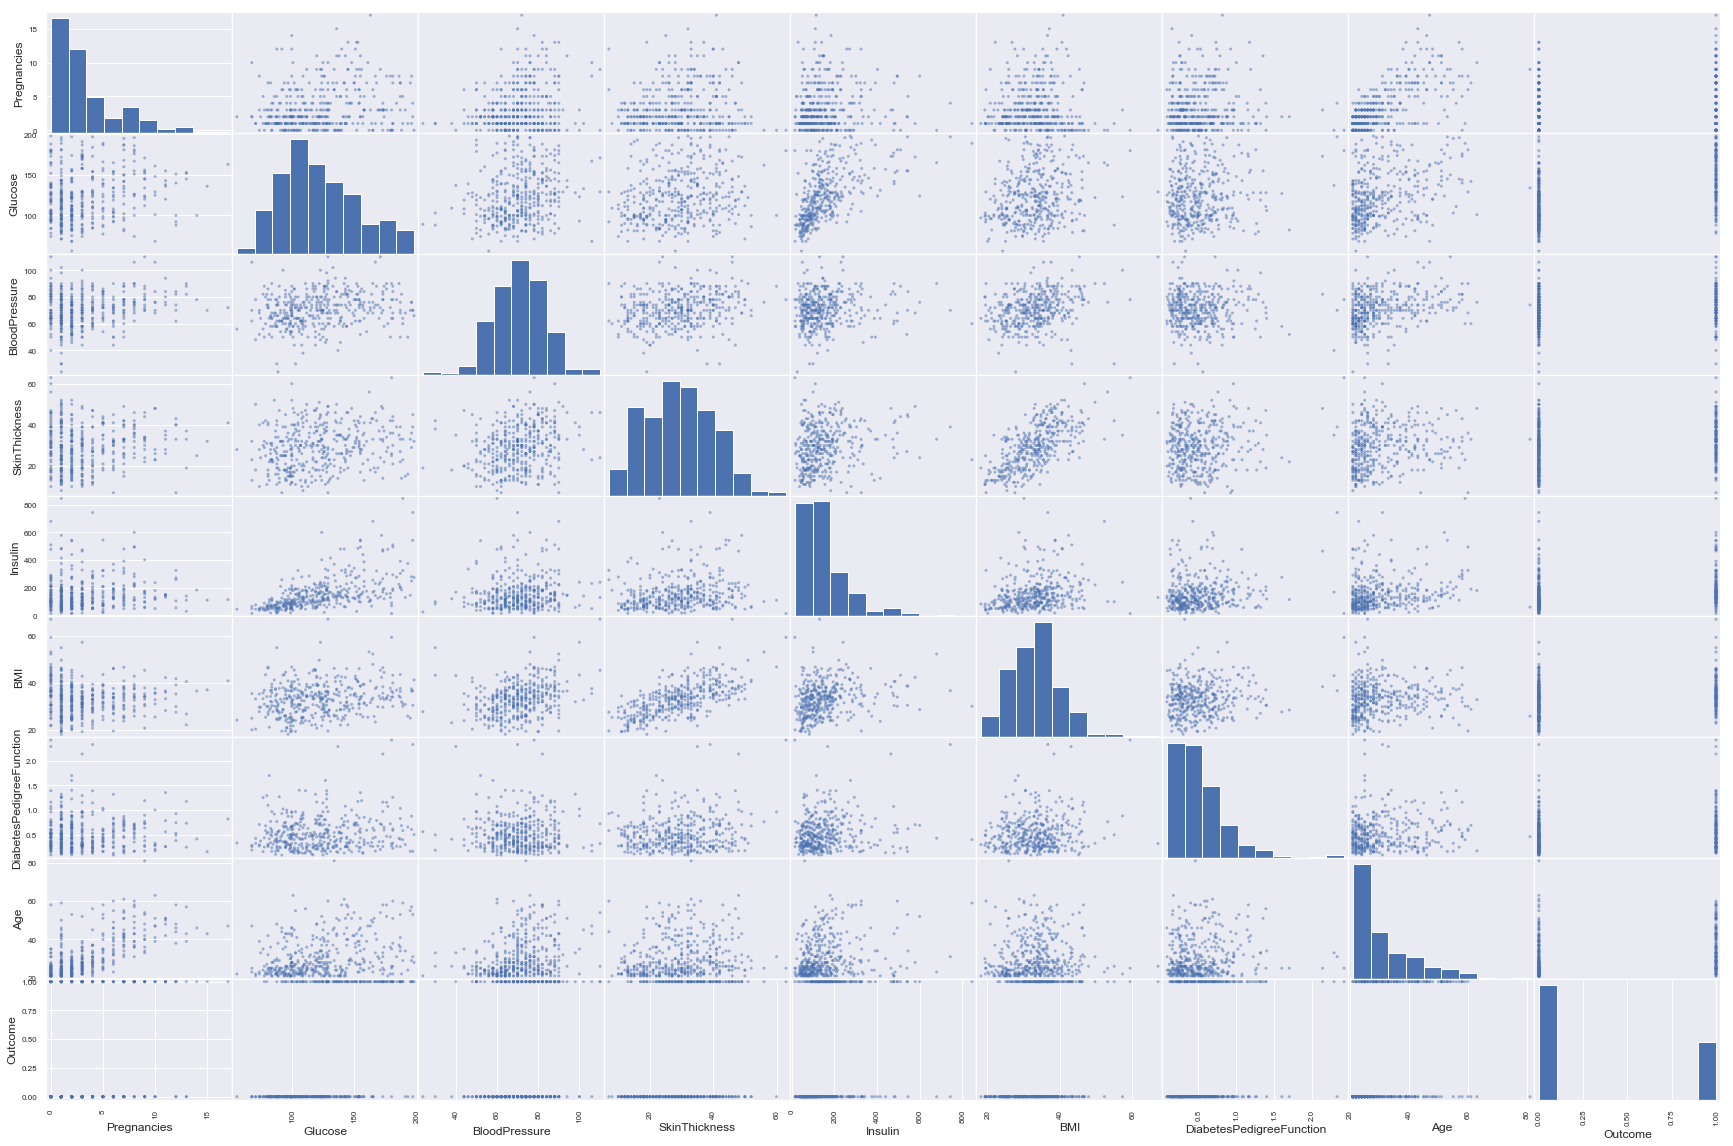

In [25]:
## Plotting the correlation between columns
df_wo_zeros = pima_df[~((pima_df.Glucose==0) | 
                  (pima_df.BloodPressure==0) | 
                  (pima_df.SkinThickness==0) | 
                  (pima_df.Insulin==0) | 
                  (pima_df.BMI==0))]
print(df_wo_zeros.shape)
scatter_matrix(df_wo_zeros, figsize=(30,20));

We see from the above plot that BMI and Skin Thickness are correlated. We also see that Insulin and Glucose seem correlated. 
There also is some weak correlations between Age and Pregnancies.

**2.1.4. Separating dataset into clean and unclean (has missing values)**

In [26]:
## cols with missing values
missing_cols = ['SkinThickness', 'BloodPressure', 'Glucose', 'BMI', 'Insulin']
target_col = ['Outcome']

## dataset without any missing values; not normalised
clean_data = pima_df[~((pima_df[missing_cols[0]]==0) | 
                  (pima_df[missing_cols[1]]==0) | 
                  (pima_df[missing_cols[2]]==0) |
                  (pima_df[missing_cols[3]]==0) |
                  (pima_df[missing_cols[4]]==0) 
                  )]

## dataset with missing values that need to be imputed; not normalised
unclean_data = pima_df[((pima_df[missing_cols[0]]==0) | 
                  (pima_df[missing_cols[1]]==0) | 
                  (pima_df[missing_cols[2]]==0) |
                  (pima_df[missing_cols[3]]==0) |
                  (pima_df[missing_cols[4]]==0)                                  
                  )]

print(clean_data.shape, unclean_data.shape)

(391, 9) (373, 9)


**2.2** Split the dataset into a 75-25 train-test split (use `random_state=9001`). Fit a logistic regression classifier to the training set and report the  accuracy of the classifier on the test set. You should use $L_2$ regularization in logistic regression, with the regularization parameter tuned using cross-validation (`LogisticRegressionCV`).  Report the overall classification rate.

In [41]:
pima_df_clean1 = pima_df.copy() 
print(pima_df_clean1.shape)
pima_df_clean1.head()

(764, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
def normalise_df(df, mins, maxs):
    df = (df - mins)/(maxs - mins)
    return df

In [29]:
## split into X and Y
X, Y = pima_df_clean1[pima_df_clean1.columns.difference([target_col[0]])], pima_df_clean1[target_col[0]]
print(X.shape, Y.shape)

## splitting data into train-test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.25, random_state=9001)
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

## normalising the data
mins = x_train1.min()
maxs = x_train1.max()
x_train1 = normalise_df(x_train1, mins, maxs)
x_test1 = normalise_df(x_test1, mins, maxs)

(764, 8) (764,)
(573, 8) (191, 8) (573,) (191,)


In [30]:
## logostic regression CV
def fit_logreg(xtrain, xtest, ytrain, ytest):
    logreg = LogisticRegressionCV(fit_intercept=True, cv=5, penalty='l2') 
    logreg.fit(xtrain, ytrain)
    
    # accuracy on test set
    acc = accuracy_score(logreg.predict(xtest), ytest)
        
    return logreg, acc

logreg1, acc1 = fit_logreg(x_train1, x_test1, y_train1, y_test1)
print('Classification accuracy of fitted model on test set = {:.2f}'.format(acc1))

## Comparing number of cases for each diabetes type
print(y_train1[y_train1==0].shape, y_train1[y_train1==1].shape)

Classification accuracy of fitted model on test set = 0.78
(364,) (209,)


**2.3** Restart with a fresh copy of the whole dataset and impute the missing data via mean imputation.  Split the data 75-25 (use `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.    

> We start with `clean_data` dataset (dataset which doesn't have any missing values) to find the means to impute with. These mean values are then imputed in the `unclean_data` dataset (which has all the rows with missing data).

In [31]:
## finding mean values
pima_df_clean2 = unclean_data.copy() # making copy of unclean dataset
means = clean_data.mean() # finding means from dataset previously cleaned

## imputing missing data in pima_df_clean2 using mean values
for i in range(len(missing_cols)):
    pima_df_clean2 = pima_df_clean2.replace({missing_cols[i]: {0: means[missing_cols[i]]}})

## merge clean dataset and pima_df_clean2
pima_df_clean2 = pima_df_clean2.append(clean_data)

> We can also note here that mean values after imputation are close to the mean values of only clean dataset.

In [32]:
## split into X and Y
X, Y = pima_df_clean2[pima_df_clean2.columns.difference([target_col[0]])], pima_df_clean2[target_col[0]]

## splitting data into train-test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.25, random_state=9001)

## normalising the data
mins = x_train2.min()
maxs = x_train2.max()
x_train2 = normalise_df(x_train2, mins, maxs)
x_test2 = normalise_df(x_test2, mins, maxs)

logreg2, acc2 = fit_logreg(x_train2, x_test2, y_train2, y_test2)
print('Classification accuracy of fitted model on test set = {:.2f}'.format(acc2))

Classification accuracy of fitted model on test set = 0.76


**2.4** Again restart with a fresh copy of the whole dataset and impute the missing data via a model-based imputation method. Once again split the data 75-25 (same `random_state=9001`) and fit the regularized logistic regression model.  Report the overall classification rate.

> Here, we impute on the `pima_df` dataset using linear regression. Note that we are imputing first on the column with the maximum number of missing values and then in decreasing order of the number of missing values each column. With each imputation, we replace values in corresponding column of the training data before using it for the next imputation. Imputation of all predictors with missing values is done for 20 iterations, so that results are more robust.

In [33]:
missing_cols = ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI', 'Glucose']
target_col = ['Outcome']

pima_df_clean3 = unclean_data.copy() # making fresh copy of unclean dataset
train_data = pima_df.copy() # start with original dataset

## running for 20 iterations for robustness
for it in range(20):
    # finding missing values to be imputed using multiple linear regression model
    for col in missing_cols:
        sub_train = train_data
        sub_test = unclean_data[unclean_data[col] == 0] # subset of unclean data with missing values in given column

        sub_xtrain, sub_ytrain = sub_train[sub_train.columns.difference([col]+target_col)], sub_train[col]
        sub_xtest, sub_ytest = sub_test[sub_test.columns.difference([col]+target_col)], sub_test[col] 

        # normalising the train and test predictors
        sub_mins, sub_maxs = sub_xtrain.min(), sub_xtrain.max()
        sub_xtrain = normalise_df(sub_xtrain, sub_mins, sub_maxs)
        sub_xtest = normalise_df(sub_xtest, sub_mins, sub_maxs)    

        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(sub_xtrain, sub_ytrain)
        sub_ytest_hat = linreg.predict(sub_xtest)

        # impute values in the unclean dataframe
        pima_df_clean3[col].replace([0]*len(sub_ytest_hat), sub_ytest_hat, inplace=True)  
        
        # re-construct the train dataset by combining clean data with newly imputed values
        train_data = pima_df_clean3.append(clean_data)
        
    
pima_df_clean3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,4.436997,120.749869,71.915969,18.598495,-29.375937,31.319273,0.419204,35.745308,0.367292
std,3.442996,30.081118,13.910409,10.772890,6.727150,7.177060,0.308532,12.753537,0.482715
min,0.000000,44.000000,44.000000,8.000000,-29.836184,16.262622,0.078000,21.000000,0.000000
25%,1.000000,101.000000,64.000000,11.717870,-29.836184,26.400000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,11.717870,-29.836184,31.200000,0.302000,32.000000,0.000000
75%,7.000000,138.000000,80.000000,26.000000,-29.836184,35.600000,0.557000,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,89.000000,52.900000,1.893000,72.000000,1.000000


In [34]:
## merging cleaned data with original clean data
pima_df_clean3 = pima_df_clean3.append(clean_data)
print(pima_df_clean3.shape)
pima_df_clean3.describe()

(764, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,121.712959,71.273111,24.004239,65.582167,32.232577,0.472712,33.248691,0.349476
std,3.374327,30.497620,13.219429,11.879432,125.977154,7.152421,0.331981,11.771901,0.477117
min,0.000000,44.000000,24.000000,7.000000,-29.836184,16.262622,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,11.717870,-29.836184,27.300000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
## split into X and Y
X, Y = pima_df_clean3[pima_df_clean3.columns.difference([target_col[0]])], pima_df_clean3[target_col[0]]
print(X.shape, Y.shape)

## splitting data into train-test
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.25, random_state=9001)
print(x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape)

## normalising the data
mins = x_train3.min()
maxs = x_train3.max()
x_train3 = normalise_df(x_train3, mins, maxs)
x_test3 = normalise_df(x_test3, mins, maxs)

logreg3, acc3 = fit_logreg(x_train3, x_test3, y_train3, y_test3)
print('Classification accuracy of fitted model on test set =', acc3)

(764, 8) (764,)
(573, 8) (191, 8) (573,) (191,)
Classification accuracy of fitted model on test set = 0.7696335078534031


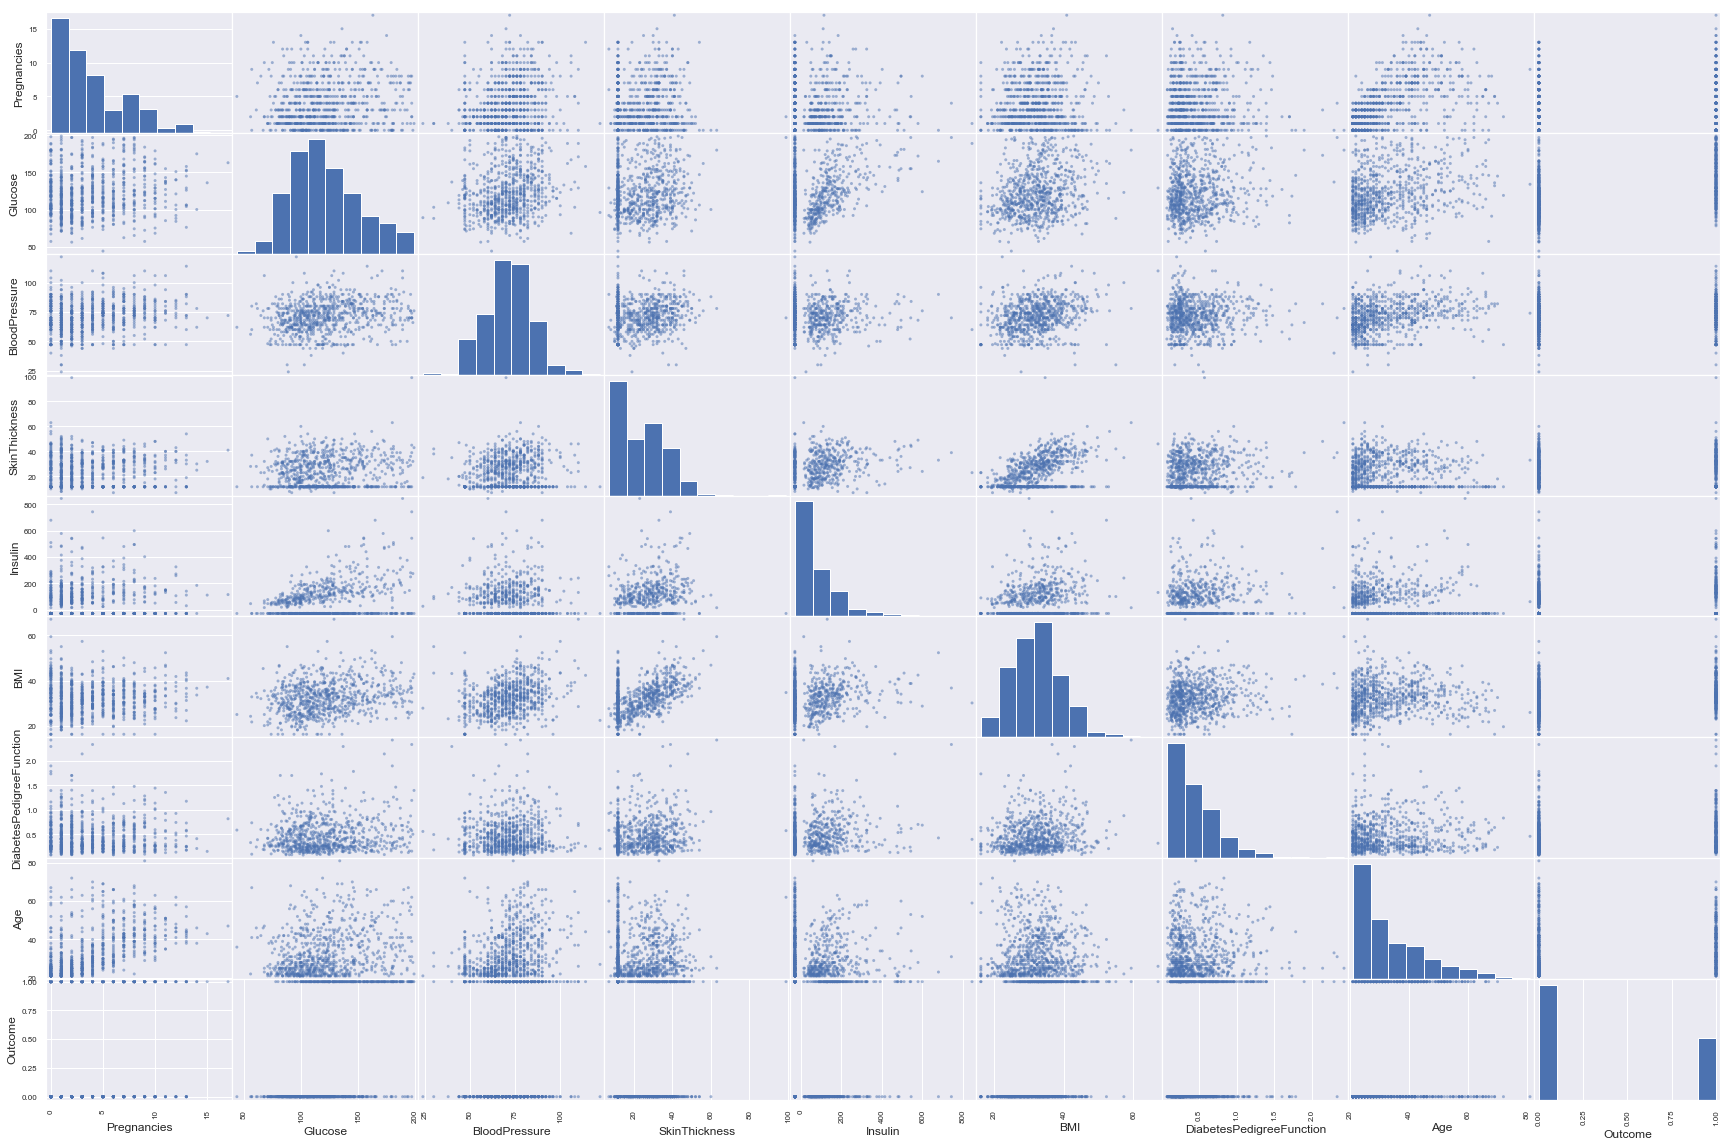

In [36]:
scatter_matrix(pima_df_clean3, figsize=(30,20));

In [37]:
print(x_train3.columns)
logreg3.coef_

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'Pregnancies', 'SkinThickness'],
      dtype='object')


array([[ 1.30114753,  4.61722603, -1.3818104 ,  2.04838476,  6.08359398,
        -1.94503677,  1.83405005,  0.36743891]])

**2.5** Compare the results in the 3 previous parts of this problem.  Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods, and conjecture and explain why you get the results that you see.

In [38]:
## Adding parameters and accuracy of the three models in a dataframe
df = pd.DataFrame(data = logreg1.coef_, columns=x_train1.columns)
df.loc[1] = logreg2.coef_[0]
df.loc[2] = logreg3.coef_[0]
df['acc'] = [acc1, acc2, acc3]
df.insert(loc=0, column='model', value=['logreg1', 'logreg2', 'logreg3'])
df.head()

,model,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,acc
0,logreg1,0.747861,5.087725,-1.171398,2.535750,7.422930,-0.837808,2.076007,-0.597105,0.780105
1,logreg2,1.133757,3.224684,-0.125292,1.488246,4.928563,-0.304972,1.650732,0.624600,0.759162
2,logreg3,1.301148,4.617226,-1.381810,2.048385,6.083594,-1.945037,1.834050,0.367439,0.769634


Here, 
 * method 1: logreg1, logistic regression with missing values
 * method 2: logreg2, is mean imputation method and 
 * method 3: logreg3, model imputation with linear regression.
 

Results
1. In method 1, we include all observations with missing values to perform logistic regression. This means a lot of training data will have zeros in it, which is likely to affect the coefficients of predictors and hence, the predicted values.
2. In method 2, mean imputations can lead to a complete dataset without missing values but can affect the variance model. The accuracy of 0.759 are lower than method 1.
3. Method 3 uses a linear regression method to compute missing column values by using all other predictors. The accuracy (0.769) is comparable to method 2. We perform this imputation iteratively until a robust imputation is found.

To summarise the statistics, for accuracy Method $1>2$ and $2<3$.
In terms of computational complexity, method 1 requires only logistic regression, method 2 requires substitution operation followed by logistic regression, while method 3 requires predicting and replacing missing value using Linear Regression for 20 iterations, followed by Logistic Regression. Thus, complexity of $1<2<3$.

Overall, method 3 seems computationally most stable. 

Thus, we can use the model imputation method for our classification.


**2.6** Which predictors coefficients changed? Comment on the findings.

> We will check the percentage change in predictor coefficients from the mean imputed method to model imputed method. 

In [39]:
## Finding percentage change between models 2 and 3
change = (logreg3.coef_ - logreg2.coef_)*100/logreg2.coef_
change = list(change[0])
df.loc[3] = ['(logreg3-logreg2) % change'] + change + [0]
df

,model,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,acc
0,logreg1,0.747861,5.087725,-1.171398,2.535750,7.422930,-0.837808,2.076007,-0.597105,0.780105
1,logreg2,1.133757,3.224684,-0.125292,1.488246,4.928563,-0.304972,1.650732,0.624600,0.759162
2,logreg3,1.301148,4.617226,-1.381810,2.048385,6.083594,-1.945037,1.834050,0.367439,0.769634
3,(logreg3-logreg2) % change,14.764193,43.183837,1002.867824,37.637534,23.435443,537.776180,11.105227,-41.172165,0.000000


In [40]:
print('Glucose = 0 for', len(pima_df[pima_df.Glucose==0]), 'rows')
print('Age = 0 for', len(pima_df[pima_df.Age==0]), 'rows')
print('BloodPressure = 0 for', len(pima_df[pima_df.BloodPressure==0]), 'rows')
print('DiabetesPedigreeFunction = 0 for', len(pima_df[pima_df.DiabetesPedigreeFunction==0]), 'rows')
print('SkinThickness = 0 for', len(pima_df[pima_df.SkinThickness==0]), 'rows')
print('Insulin = 0 for', len(pima_df[pima_df.Insulin==0]), 'rows')
print('BMI = 0 for', len(pima_df[pima_df.BMI==0]), 'rows')
print('Total number of rows with disguised missing data =', 
      len(pima_df[(pima_df.Glucose==0) | 
                  (pima_df.BloodPressure==0) | 
                  (pima_df.SkinThickness==0) | 
                  (pima_df.Insulin==0) | 
                  (pima_df.BMI==0)]), 'rows')

Glucose = 0 for 5 rows
Age = 0 for 0 rows
BloodPressure = 0 for 35 rows
DiabetesPedigreeFunction = 0 for 0 rows
SkinThickness = 0 for 226 rows
Insulin = 0 for 371 rows
BMI = 0 for 11 rows
Total number of rows with disguised missing data = 373 rows


> Blood pressure has the highest percentage change between mean based and model based imputations. As we can see from above, this is also the column with most number of imputed values. Insulin also has high percentage change, and it also had 35 missing values. Skin Thickness, which had the second highest number of missing values, has a negative percentage change of 41%. 